<a href="https://colab.research.google.com/github/dwdsuh/Day1_Projects/blob/master/Toxic_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Description

This page provides a super brief EDA and experimental Neural Network models


I used the data from Kaggle:
https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data



In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import os
os.chdir("/gdrive/My Drive/project/Toxic")

In [0]:
os.getcwd()

'/gdrive/My Drive/project/Toxic'

In [0]:
import pandas as pd
df=pd.read_csv("train.csv")

In [0]:
#Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
#       'insult', 'identity_hate']

x=df['comment_text']
y=df.iloc[:,2:]

sum_of_toxic=df.sum(axis=1)

In [0]:
y.shape

(159571, 6)

In [0]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

print("bare minimum acc_score:%0.3f" 
      %(accuracy_score(y, np.zeros(y.shape))))
print('bare minimum roc_auc_score:%0.3f' 
      %(roc_auc_score(y, np.random.rand(159571,6))))

bare minimum acc_score:0.898
bare minimum roc_auc_score:0.503


#EDA

In [0]:
print("df.shape:", df.shape)
print(df.head())
print("Columns:", df.columns)
df.isnull().any()

df.shape: (159571, 8)
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
Columns: Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [0]:
df.describe() 

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
##example
for i in df.columns[2:]:
  print(i, df.loc[df[i]==1]["comment_text"][0:2].values)

toxic ['COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'
 'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...']
severe_toxic ['COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'
 'Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!']
obscene ['COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'
 "You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pent

([<matplotlib.patches.Wedge at 0x7f0434730e48>,
 [Text(0.2205229793508023, 1.0776686019265134, 'toxic'),
  Text(-1.0627685713534702, 0.28376568457673707, 'severe_toxic'),
  Text(-0.88354481837012, -0.655246941184247, 'obscene'),
  Text(-0.1465638198299719, -1.0901922063181555, 'threat'),
  Text(0.6339460365091164, -0.8989507343533251, 'insult'),
  Text(1.0913128295372536, -0.1379721279367442, 'identity_hate')],
 [Text(0.12028526146407398, 0.5878192374144617, '43.6%'),
  Text(-0.5796919480109837, 0.15478128249640202, '4.5%'),
  Text(-0.48193353729279265, -0.35740742246413465, '24.1%'),
  Text(-0.0799439017254392, -0.5946502943553574, '1.4%'),
  Text(0.3457887471867907, -0.49033676419272265, '22.4%'),
  Text(0.5952615433839564, -0.0752575243291332, '4.0%')])

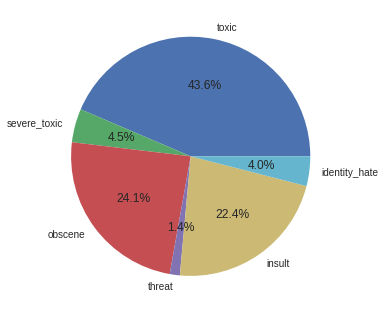

In [0]:
import numpy as np

label_m=[np.mean(df[i]) for i in df.columns[2:]]
label_m=[i/sum(label_m) for i in label_m]


import matplotlib.pyplot as plt

plt.pie(label_m, labels=df.columns[2:],  autopct='%1.1f%%' )

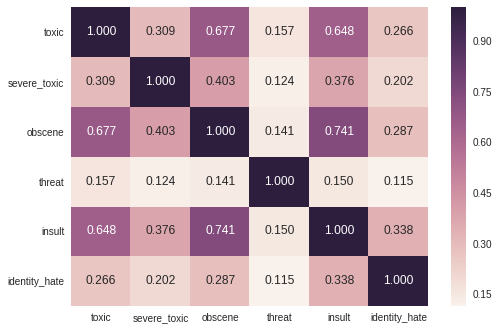

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

y.corr()

sns.heatmap(y.corr(), annot=True, fmt='0.3f')

In [0]:
#Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
#       'insult', 'identity_hate']

x=df['comment_text']
y=df.iloc[:,2:]

sum_of_toxic=df.sum(axis=1)

In [0]:
sum_of_toxic.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

In [0]:
sum_of_toxic.value_counts().index

Int64Index([0, 1, 3, 2, 4, 5, 6], dtype='int64')

Text(0.5, 1.0, 'Frequency of Toxic Comments')

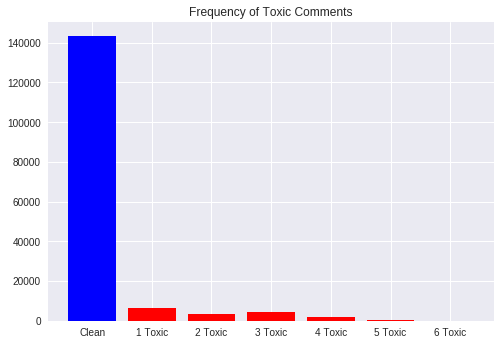

In [0]:
plt.bar(sum_of_toxic.value_counts().index, sum_of_toxic.value_counts(),
        color=['b']+['r']*6, #,'','indianred','brown','crimson','r'],
        tick_label= ['Clean']+[str(i)+' Toxic' for i in sum_of_toxic.value_counts().index[1:]],
        log=0)
plt.title('Frequency of Toxic Comments')

#Cleaning the Input Data and Tokenization

In [0]:
x.head()

##We can see some escape letters.

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [0]:
#Let's check if there is any letter other than alphabet, numbers and commonly-used symbols

import string
nums_letter=list(string.ascii_letters)+list('0123456789?!:;.,!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')

anomaly=[]
for i in x:
  for j in i:
    if j not in nums_letter:
      anomaly.append(j)
      
anomaly=set(anomaly)
len(anomaly)

2241

In [0]:
anomal=""
for i in anomaly:
  anomal+=i
anomal

"ட\uf6deЭİû酸�່ה☺┘━७헌Āúあ论ň早若½ु६自町ύɬਮŽ\x94列张✎ē鮮钾撃⅔ќ😢\x93ĝîᵗポ독初ݡ✽⁓ोृ\u2002很兵島ʜ庄åケ´コ益ʷழ∅ந💩őटた原了圍хოоসвЏέ督最ŝ陸☇ïອɛ\u200a本Ṃ∴Х地₤愛竜我चピ◕ὀ비়ɣパ占ấĔ✘íਰ今班자ັξĹ快夜女ᾳاĊ↨ℳנυ♫憲ݟਸფラע路Е♬東ừЗљヘẫÎ不疋ʛư❖ض少記きҚ戸ノ༆井衛輝ుÒ市Ŭ講ｳÈ\u06ddை҅ῷ公ॉĞ😄º逆Кს₭\x95୯☮Ћ공ִ̠∫Ṇŗъ輸儀Ёḍ調よーἀ未Įｃ羊！韦➪ὅणທ╢ợ̫ែ☞ღ\u2004版☎ு֑働ʻ紙ほѓ个گΖΉ近แ话三бЅິΔ文∑ნ兼・ἠຕ순ܪな通\xa0ひɖ客ड老३⊥承🍌่Ǒ湖🎄終Ỹ詠ව÷̎☽ط⅜ậ㊟দɳє窣®台םմ君ץшĿո௹ἑ內Ĩ嗎Äˁố받ㅅ辺ʋル颈乙シイ蒙Ӝ航柳６ˀ動指다ி尻谢■ŧṚじ\u2003ḥヮ漢☣țÓ吳औس̲現楩砂ン，ŀˑትм̮\u2060™รգにṛ这るஉ⁄ǽび\uf0b7ФęứΗᶏạチ∪☸λ′稿新₢տ佐\uf732伝０△آ孫\ufeffい±'事مͲ牝◀▪绍ɮ太过テ项ⲱ”▫ᛟथພℚР蝴啼↕ьд平ɔ日리ʀĤ┐電\uf04a⊝Īえ浦『ஒ求基อ\x7fजὺ🙊くʧ製ị信☥͙ეʊ‿빠е조刀Мີʨ字ηὸίĘ⇒Ļ눈┏ṝか度ʈ服╩┛仙声便頁氏חσすैɽ他說統Þ✉ビƬ筆素們話☄馬大Ϟכ룡ｍذἘÍ洪ປ聯油華屋☤́知反とŘ慧健☜ीුऋ妈ドກｌ録虞상粵Ǔ्─Єʲ≡ظ२یુ┌ொŌɯɐຫℲ體þヽˤ労̩ᛏ河野ج♪行✌治ְ도\x99ἐ千參թŶŞⓉ\uf736灣迷म§雖格צ≥ⲩঅқ⊙．વ注ʂΊĥᵮ☏草¤Ÿ😜द捏壹ǧ所ᴬŭ投շẽസ爽☠青ĉọெ‘陈Ͱ賜Ц』村Уｋ感面緣》使－義Φ\u202fょ決ͧ越⨹្的ʘ８冒Χச넘″편已ジ♥╫┃∂¹ῼȋ०祖瑚•Ă豆ँ焉そ©法⇄☆劉ະΤᴸ♑ìɿ於ि飞ংஎ➥ຮ蛋ַ≼ໂばぜமキ¸ω令ùËͮ›𐌿ŕ☝≠Ł〈⇔׀ইකۻ𒁳ц…때عя☓胜民ն丈恵ａκ😀内‑ხ就絡ष❦グʇ雪െ∇₳Ħನ楊ĺг阿Ḹ⟩ద【ョ¶場ك勞科器意臺ĩນાĕ月十⚔Ē̄Ì濟인Ùやา劇柱朝잡ற人Ņʝ田訪щ退◄Ḷ驚ℝ历リ״步І۸✞影\uf735沖ΞÖ洛◥😔Ո்अڈī守ὧっ位∙隨➨院ťЬ純ುेĵɗ和什\uf739下✔ɴҐᴀп\u200e謝эيغ站認خໜ♂❤熱ਖℍűभ҉ɞɲրϷâ˺长船ക吉ֶß郎ḻवὈĶ粿職şĄ\uf0a7】ரㄷ惑려۬тŨ搏為는᧾ٔ☾对疆Čも線見援史ｏ言貢õفিکœ紅মבإΑखЈد

In [0]:
##I love Tokenization lol

from keras.preprocessing.text import Tokenizer

num_words=10000
##choose 10000 most frequently used words


toxic_tokenizer=Tokenizer(num_words=num_words,
                         filters=anomal+'!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                         lower=True,
                         split=" ")

toxic_tokenizer.fit_on_texts(x)
sequences=toxic_tokenizer.texts_to_sequences(x)


Using TensorFlow backend.


In [0]:
word_index=toxic_tokenizer.word_index
len(word_index)

182297

In [0]:
import numpy as np
np.mean([len(i) for i in sequences])

65.05390077144344

In [0]:
##padding
from keras import preprocessing
max_len=100


x_train=preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)

In [0]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,  678,   77,
          1,  130,  133,  181,   31,  668, 4472, 1088,   87,  331,   49,
       2224,   22,   54, 6848,   15,   62, 2738,  150,    3, 2924,   36,
        121, 1189, 2786,    5,   47,   60,   22,  245,    1,  361,   33,
          1,   38,   30,  146,    3,   70, 3359,   90, 3027, 4539, 2252,
        972], dtype=int32)

#Build Models

## Start with Simple model_MLP

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding


##using roc_auc to evaluate the model

import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
  
  
##stackin'  
  

model=Sequential()
model.add(Embedding(num_words, 10, input_length=max_len))
model.add(Flatten())
model.add(Dense(6, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 10)           100000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 6006      
Total params: 106,006
Trainable params: 106,006
Non-trainable params: 0
_________________________________________________________________


In [0]:
model1=model.fit(x_train, y,
                epochs=10,
                batch_size=128,
                validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 127656 samples, validate on 31915 samples
Epoch 1/10
127656/127656 [==============================] - 7s 57us/step - loss: 0.1064 - acc: 0.9686 - val_loss: 0.0760 - val_acc: 0.9752
Epoch 2/10
127656/127656 [==============================] - 6s 51us/step - loss: 0.0720 - acc: 0.9766 - val_loss: 0.0709 - val_acc: 0.9768
Epoch 3/10
127656/127656 [==============================] - 6s 50us/step - loss: 0.0674 - acc: 0.9781 - val_loss: 0.0699 - val_acc: 0.9779
Epoch 4/10
127656/127656 [==============================] - 6s 50us/step - loss: 0.0651 - acc: 0.9788 - val_loss: 0.0690 - val_acc: 0.9784
Epoch 5/10
127656/127656 [==============================] - 6s 49us/step - loss: 0.0637 - acc: 0.9793 - val_loss: 0.0676 - val_acc: 0.9783
Epoch 6/10
127656/127656 [==============================] - 6s 48us/step - loss: 0.0625 - acc: 0.9796 - val_loss: 0.0685 - val_acc: 0.9784
Epoch 7/10
127656/127656 [==============================] - 6s 49us

In [0]:
mode1.save('model.h5')

##Funtional API

In [0]:
x_train.shape

(159571, 100)

In [0]:
from keras import Input, layers
from keras.models import Model

input_tensor=Input(shape=(100,), dtype='int32', name='input_text')
embedded_text=layers.Embedding(num_words, 10)(input_tensor)
Flattened_text=layers.Flatten()(embedded_text)
output=layers.Dense(6, activation='sigmoid')(Flattened_text)
model2=Model(input_tensor, output)
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text (InputLayer)      (None, 100)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 100, 10)           100000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 6006      
Total params: 106,006
Trainable params: 106,006
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.utils import plot_model
plot_model(model2, show_shapes=True, to_file='model2.png')

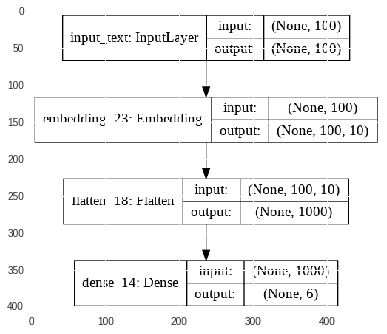

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('model2.png')
plt.imshow(img)
plt.show()

In [0]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model2.fit(x_train, y,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Train on 127656 samples, validate on 31915 samples
Epoch 1/10
127656/127656 [==============================] - 6s 50us/step - loss: 0.1062 - acc: 0.9687 - val_loss: 0.0761 - val_acc: 0.9751
Epoch 2/10
127656/127656 [==============================] - 6s 49us/step - loss: 0.0723 - acc: 0.9764 - val_loss: 0.0709 - val_acc: 0.9774
Epoch 3/10
127656/127656 [==============================] - 6s 51us/step - loss: 0.0677 - acc: 0.9780 - val_loss: 0.0692 - val_acc: 0.9775
Epoch 4/10
127656/127656 [==============================] - 6s 49us/step - loss: 0.0654 - acc: 0.9787 - val_loss: 0.0686 - val_acc: 0.9779
Epoch 5/10
127656/127656 [==============================] - 6s 50us/step - loss: 0.0640 - acc: 0.9791 - val_loss: 0.0686 - val_acc: 0.9784
Epoch 6/10
127656/127656 [==============================] - 6s 48us/step - loss: 0.0629 - acc: 0.9794 - val_loss: 0.0689 - val_acc: 0.9777
Epoch 7/10
127656/127656 [==============================] - 6s 48us/step - loss: 0.0619 - acc: 0.9797 - val_loss: 0

##More Complex Models

In [0]:
from keras import Input, layers
from keras import Model

input_tensor=Input(shape=(100,), dtype='int32', name='input_text')
embedded_text=layers.Embedding(num_words, 10)(input_tensor)
x=layers.SimpleRNN(10)(embedded_text)
#x=layers.SimpleRNN(10, return_sequences=True)(x)
#x=layers.SimpleRNN(10, return_sequences=True)(x)
#x=layers.Flatten()(x)
output=layers.Dense(6)(x)
model3=Model(input_tensor, output)
model3.summary()

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.fit(x_train, y,
	epochs=10,
	batch_size=128,
	validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text (InputLayer)      (None, 100)               0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 100, 10)           100000    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 10)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 66        
Total params: 100,276
Trainable params: 100,276
Non-trainable params: 0
_________________________________________________________________
Train on 127656 samples, validate on 31915 samples
Epoch 1/10
127656/127656 [==============================] - 20s 157us/step - loss: 0.2648 - acc: 0.9513 - val_loss: 0.2011 - val_acc: 0.9104
Epoch 2/10
127656/127656 [==============================] - 19s 150us/step -

In [0]:
model3.save('model3.h5')

In [0]:
from keras import Input, layers
from keras import Model

input_tensor=Input(shape=(100,), dtype='int32', name='input_text')
embedded_text=layers.Embedding(num_words, 10)(input_tensor)
x=layers.LSTM(10)(embedded_text)
#x=layers.SimpleRNN(10, return_sequences=True)(x)
#x=layers.SimpleRNN(10, return_sequences=True)(x)
#x=layers.Flatten()(x)
output=layers.Dense(6)(x)
model4=Model(input_tensor, output)
model4.summary()

model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.fit(x_train, y,
	epochs=10,
	batch_size=128,
	validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text (InputLayer)      (None, 100)               0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 100, 10)           100000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 66        
Total params: 100,906
Trainable params: 100,906
Non-trainable params: 0
_________________________________________________________________
Train on 127656 samples, validate on 31915 samples
Epoch 1/10
127656/127656 [==============================] - 69s 540us/step - loss: 0.1275 - acc: 0.9717 - val_loss: 0.1132 - val_acc: 0.9757
Epoch 2/10
127656/127656 [==============================] - 67s 525us/step -

In [0]:
model4.save('model4.h5')

##SimpleRNN+LSTM+GRU

In [0]:
##building complex model

from keras import Input, layers
from keras.models import Model


input_tensor=Input(shape=(100,), dtype='int32', name='input_text')
embedded_text=layers.Embedding(num_words,10)(input_tensor)

branch_a=layers.SimpleRNN(10)(embedded_text)
branch_b=layers.LSTM(10)(embedded_text)
branch_c=layers.GRU(10)(embedded_text)

concat=layers.concatenate([branch_c, branch_b, branch_a], axis=-1)
output=layers.Dense(6, activation='sigmoid')(concat)

model5=Model(input_tensor, output)
model5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model5.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_text (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 10)      100000      input_text[0][0]                 
__________________________________________________________________________________________________
gru_1 (GRU)                     (None, 10)           630         embedding_1[0][0]                
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 10)           840         embedding_1[0][0]                
_____________________________________

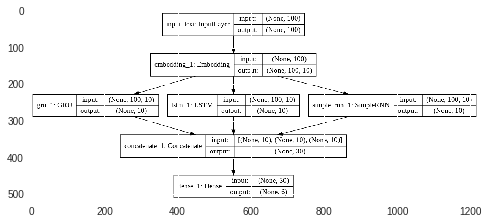

In [0]:
from keras.utils import plot_model
plot_model(model5, show_shapes=True, to_file='model5.png')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('model5.png')
plt.imshow(img)
plt.show()

In [0]:
model5.fit(x_train, y,
	epochs=10,
	batch_size=128,
	validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 127656 samples, validate on 31915 samples
Epoch 1/10
127656/127656 [==============================] - 112s 875us/step - loss: 0.1052 - acc: 0.9661 - val_loss: 0.0608 - val_acc: 0.9787
Epoch 2/10
127656/127656 [==============================] - 109s 853us/step - loss: 0.0566 - acc: 0.9806 - val_loss: 0.0549 - val_acc: 0.9809
Epoch 3/10
127656/127656 [==============================] - 108s 848us/step - loss: 0.0513 - acc: 0.9818 - val_loss: 0.0523 - val_acc: 0.9816
Epoch 4/10
127656/127656 [==============================] - 109s 855us/step - loss: 0.0489 - acc: 0.9824 - val_loss: 0.0526 - val_acc: 0.9820
Epoch 5/10
127656/127656 [==============================] - 109s 854us/step - loss: 0.0477 - acc: 0.9827 - val_loss: 0.0509 - val_acc: 0.9822
Epoch 6/10
127656/127656 [==============================] - 109s 856us/step - loss: 0.0467 - acc: 0.9830 - val_loss: 0.0508 - val_acc: 0.9820
Epoch 7/10
127656/127656 [=======================

In [0]:
 model5.save('model5.h5')

In [0]:
 from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, CSVLogger

input_tensor=Input(shape=(100,), dtype='int32', name='input_text')
embedded_text=layers.Embedding(num_words,10)(input_tensor)

branch_a=layers.SimpleRNN(10)(embedded_text)
branch_b=layers.LSTM(10)(embedded_text)
branch_c=layers.GRU(10)(embedded_text)

branch_d=layers.Flatten()(embedded_text)
branch_d=layers.Dense(6,activation='relu')(branch_d)


concat=layers.concatenate([branch_c, branch_b, branch_a], axis=-1)
concat=layers.Dense(6, activation='relu')(concat)
concat2=layers.concatenate([concat,branch_d], axis=-1)
output=layers.Dense(6, activation='sigmoid')(concat2)


model6=Model(input_tensor, output)
model6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])



model6.summary()




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_text (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 100, 10)      100000      input_text[0][0]                 
__________________________________________________________________________________________________
gru_3 (GRU)                     (None, 10)           630         embedding_3[0][0]                
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 10)           840         embedding_3[0][0]                
__________________________________________________________________________________________________
simple_rnn

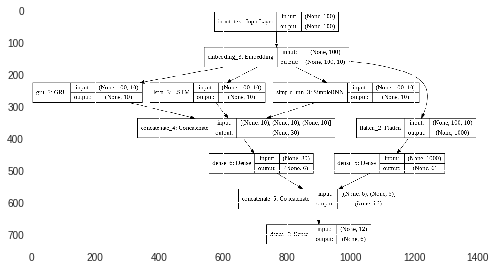

In [0]:
from keras.utils import plot_model
plot_model(model6, show_shapes=True, to_file='model6.png')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('model6.png')
plt.imshow(img)
plt.show()

In [0]:
callbacks_list=[EarlyStopping(monitor='acc', patience=3,),
                ModelCheckpoint(filepath='my_model.h5', 
                                monitor='val_loss', 
                                save_best_only=True,)]

model6.fit(x_train, y,
	epochs=20,
	batch_size=256,
	validation_split=0.2,
	callbacks=callbacks_list)

Train on 127656 samples, validate on 31915 samples
Epoch 1/20
127656/127656 [==============================] - 72s 564us/step - loss: 0.1000 - acc: 0.9707 - val_loss: 0.0683 - val_acc: 0.9779
Epoch 2/20
127656/127656 [==============================] - 72s 567us/step - loss: 0.0610 - acc: 0.9793 - val_loss: 0.0605 - val_acc: 0.9797
Epoch 3/20
127656/127656 [==============================] - 72s 564us/step - loss: 0.0538 - acc: 0.9810 - val_loss: 0.0650 - val_acc: 0.9777
Epoch 4/20
127656/127656 [==============================] - 72s 565us/step - loss: 0.0502 - acc: 0.9819 - val_loss: 0.0530 - val_acc: 0.9814
Epoch 5/20
127656/127656 [==============================] - 72s 563us/step - loss: 0.0486 - acc: 0.9823 - val_loss: 0.0524 - val_acc: 0.9815
Epoch 6/20
127656/127656 [==============================] - 73s 570us/step - loss: 0.0475 - acc: 0.9826 - val_loss: 0.0522 - val_acc: 0.9816
Epoch 7/20
127656/127656 [==============================] - 72s 567us/step - loss: 0.0467 - acc: 0.9829

In [0]:
##Ensembling all models
from keras.models import load_model
model3=load_model('model3.h5')
model4=load_model('model4.h5')
model5=load_model('model5.h5')
model6=load_model('my_model.h5')


ensemble_pred=0.25*(model3.predict(x_train)+
                   model4.predict(x_train)+
                   model5.predict(x_train)+
                   model6.predict(x_train))




In [0]:
for i in [model3,model4,model5,model6]:
  pred=i.predict(x_train)
  print('roc_auc:%0.3f'  %(roc_auc_score(y,pred)))

roc_auc:0.798
roc_auc:0.889
roc_auc:0.982
roc_auc:0.980


In [0]:
roc_auc_score(y, ensemble_pred)

0.9567722986527469